## Training Results

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

### Loss Function

/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<Figure size 400x300 with 0 Axes>

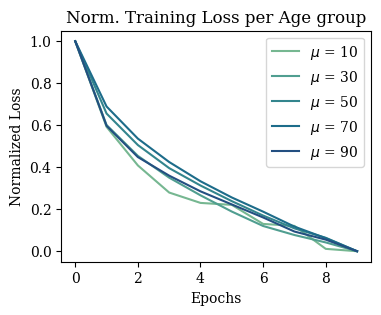

/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<Figure size 400x300 with 0 Axes>

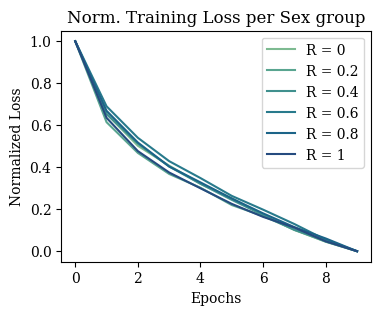

In [2]:
# Loss function for age
plt.rcParams["font.family"] = "Serif"
for group in ['age','sex']:
    path_age = '/home/juandres/aml/CheXBias/models/Experiment_2/'+group

    # List models
    models = os.listdir(path_age)
    models.sort()

    # Labels
    labels_age = ['$\mu$ = 10', '$\mu$ = 30', '$\mu$ = 50', '$\mu$ = 70', '$\mu$ = 90']
    labels_sex = ['R = 0','R = 0.2','R = 0.4','R = 0.6','R = 0.8','R = 1']

    if group == 'age':
        labels = labels_age
        range_num = 50
    else:
        labels = labels_sex 
        range_num = 60

    # Save norm loss 
    norm_loss_all = []

    fig = plt.figure(figsize=(4,3))
    for i, model in enumerate(models):
        try:
            results_test = os.path.join(path_age, model, 'results_train_data.csv')
            df = pd.read_csv(results_test)       
            norm_loss = (df['loss'] - min(df['loss']))/(max(df['loss']) - min(df['loss'])) 
            norm_loss.name=labels[i]
            norm_loss_all.append(norm_loss)
            #plt.plot(norm_loss, '-o', label=labels[i],markersize=3)
        except:
            continue

    new_df = pd.DataFrame(norm_loss_all).T.melt()
    new_df['Epoch'] = [i % 10 for i in range(range_num)]
    plt.figure(figsize=(4, 3))
    sns.lineplot(data =new_df,x = 'Epoch',y = 'value',hue='variable', palette='crest')
    plt.xlabel('Epochs')
    plt.ylabel('Normalized Loss')
    #plt.title('Training Loss')
    
    

    plt.legend()
    plt.ylabel('Normalized Loss')
    plt.xlabel('Epochs')    
    if group == 'sex':
        plt.title('Norm. Training Loss per Sex group')
    else: 
        plt.title('Norm. Training Loss per Age group')
    plt.show()

### Metrics during Training

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


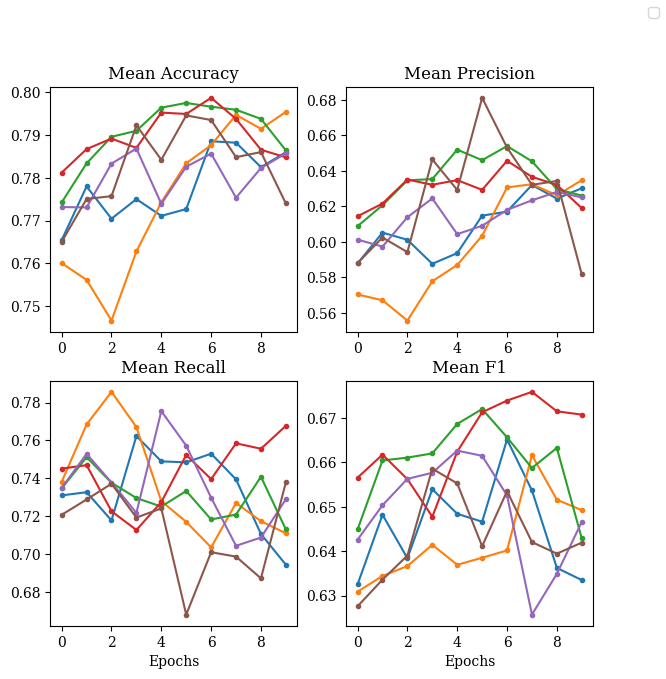

In [3]:
# Loss function for age

for group in ['sex']:
    path_age = '/home/juandres/aml/CheXBias/models/Experiment_2/'+group

    # List models
    models = os.listdir(path_age)
    models.sort()

    # Labels
    labels_age = ['$\mu$ = 10', '$\mu$ = 30', '$\mu$ = 50', '$\mu$ = 70', '$\mu$ = 90']
    labels_sex = ['R = 0','R = 0.2','R = 0.4','R = 0.6','R = 0.8','R = 1']

    if group == 'age':
        labels = labels_age
    else:
        labels = labels_sex 

    fig,ax  = plt.subplots(2,2,figsize = (7,7))
    order = [[0,0],[0,1],[1,0],[1,1]]
    for i,metric in enumerate(['mean_accuracy','mean_precision','mean_recall','mean_f1']):
        metric_pretty_name = ['Mean Accuracy','Mean Precision','Mean Recall','Mean F1']
        # Iterate over each model 
        for model in models:
            try:
                results_test = os.path.join(path_age, model, 'results_test_data.csv')
                df = pd.read_csv(results_test)                   
                ax[order[i][0],order[i][1]].plot(df[metric], '-o',markersize=3)                
            except:
                continue
        
        if order[i][0] == 1:
            ax[order[i][0],order[i][1]].set_xlabel('Epochs')
        ax[order[i][0],order[i][1]].set_title(metric_pretty_name[i])
    
    fig.legend()
        
            

### Metrics by Class

/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

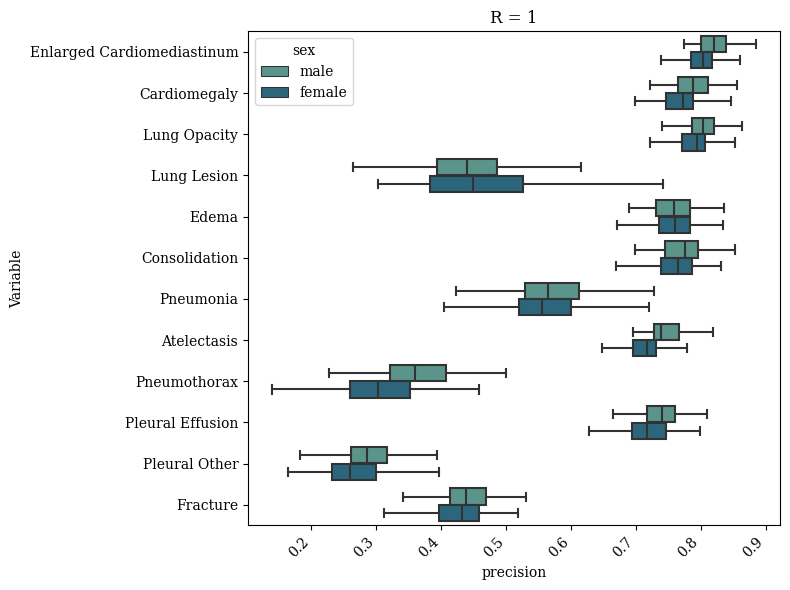

/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

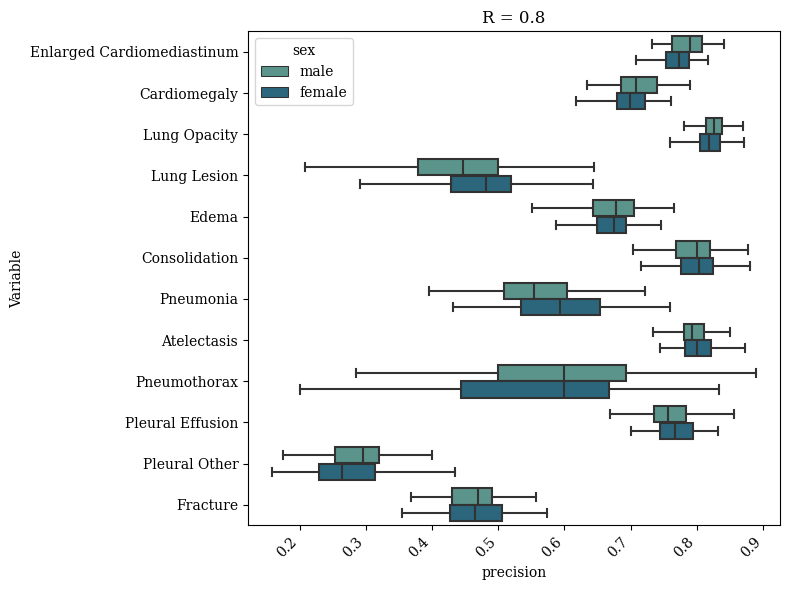

/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

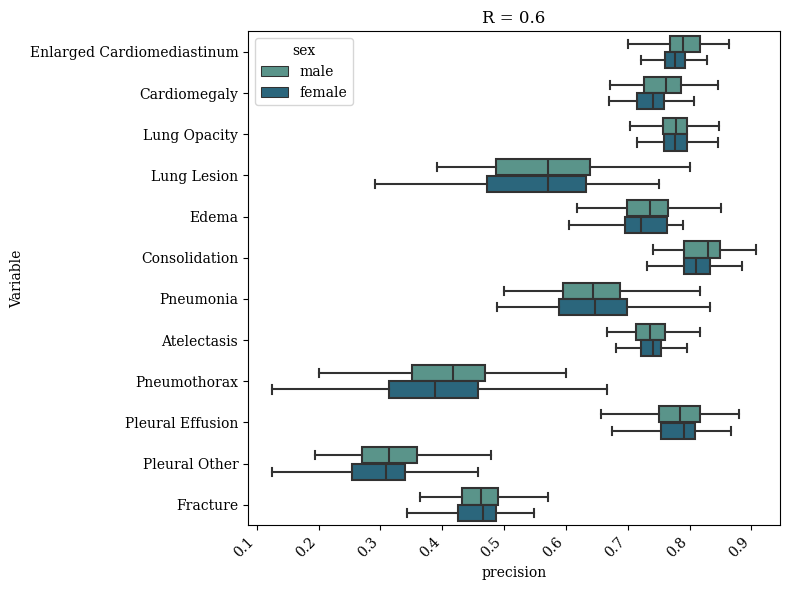

/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

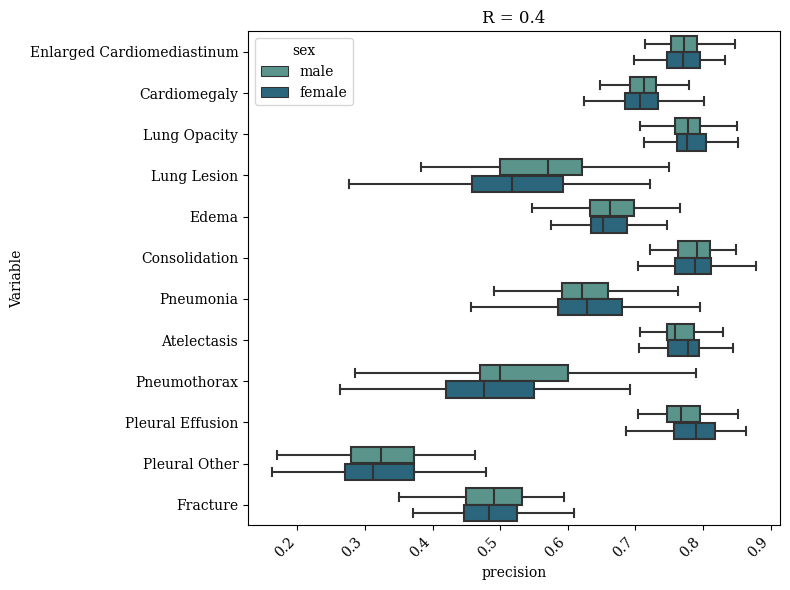

/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

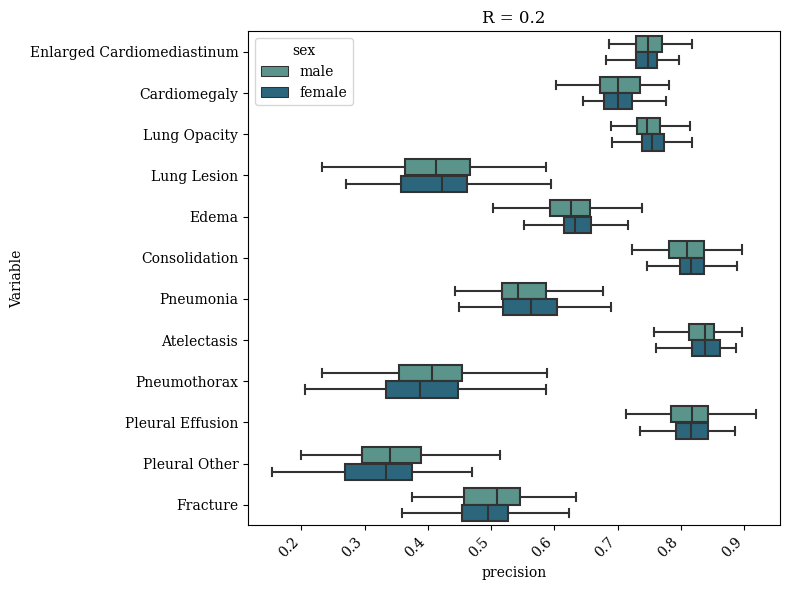

/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

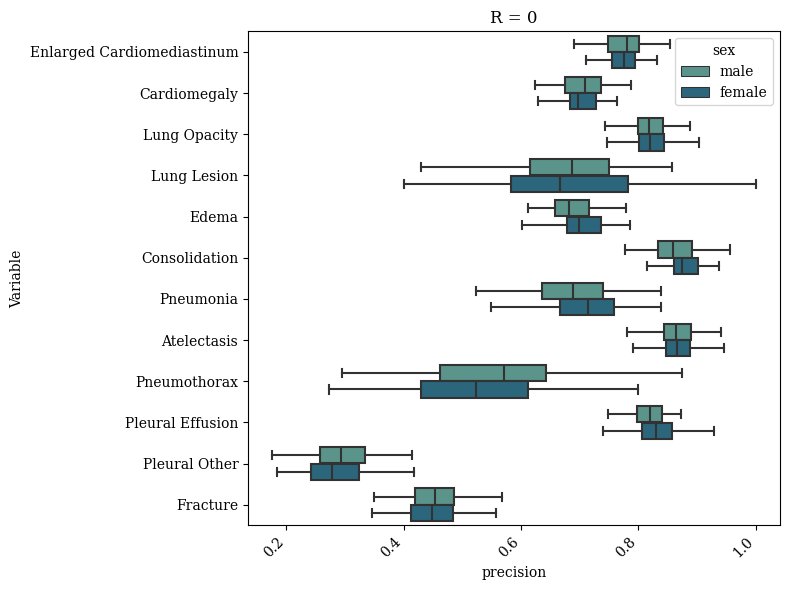

/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

Text(0, 0.5, '# of classes with p < 0.05')

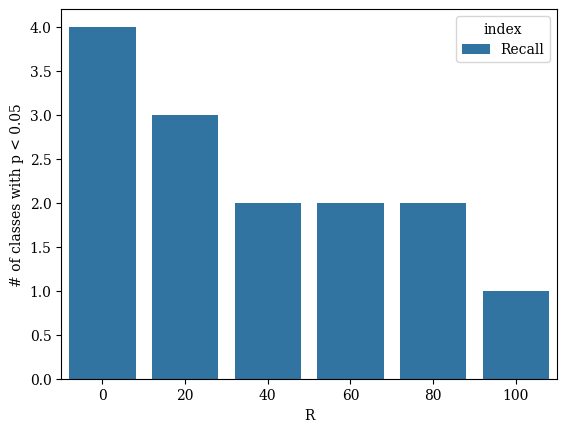

In [16]:
# Set the path to results of the experiment
path_to_results = '/home/juandres/aml/CheXBias/reports/Experiment_2'

# List all models under sex
all_models = os.listdir(os.path.join(path_to_results,'sex'))
all_models.sort()

sdf_per_metric = []

# Model Names
model_names = ['R = 1','R = 0.8','R = 0.6','R = 0.4','R = 0.2','R = 0',]

# Metric to use 
for metric in ['accuracy','precision','recall','f1']:

    # Iterate over each model

    # Count number of diferences per model
    sdf_model = []

    for i,model in enumerate(models):
        # Per each model load male and female results
        all_df = pd.DataFrame()
        for sex in ['male','female']:
            # Load results
            df = pd.read_csv(os.path.join(path_to_results,'sex',model,sex,metric+'.csv'))   
            df['sex'] = sex 
            all_df = pd.concat([all_df,df])
        
        # Melt the DataFrame to long format for box plotting
        melted_df = pd.melt(all_df, id_vars='sex', var_name='Variable', value_name='Value')

        if metric == 'precision':
            # Set up the matplotlib figure
            plt.figure(figsize=(8, 6))
        
            # Create a box plot using Seaborn
            sns.boxplot(y='Variable', x='Value', hue='sex', data=melted_df,showfliers=False,palette='crest')
        
            # Customize the plot
            plt.title('Metric per Class')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.title(model_names[i])
            plt.xlabel(metric)
        
            # Show the plot
            plt.show()

        # If not, replace 'melted_df' with your DataFrame name
        #melted_df = melted_df

        # Perform Mann-Whitney U test for each variable
        variables = melted_df['Variable'].unique()
        results = []
        count_of_classes_with_significant_diference = 0

        for variable in variables:
            male_values = melted_df[(melted_df['sex'] == 'male') & (melted_df['Variable'] == variable)]['Value']
            female_values = melted_df[(melted_df['sex'] == 'female') & (melted_df['Variable'] == variable)]['Value']

            # Perform Mann-Whitney U test
            stat, p_value = mannwhitneyu(male_values, female_values,alternative='greater')

            # Store results
            results.append({'Variable': variable, 'Stat': stat, 'P-value': p_value})

            # Test results of pvalue
            if p_value < 0.05:
                count_of_classes_with_significant_diference += 1
            
        sdf_model.append(count_of_classes_with_significant_diference)


        # Create a DataFrame from the results
        #results_melted_df = pd.DataFrame(results)

        # Display the results
        #print(results_melted_df)
    
    sdf_per_metric.append(sdf_model)

results = pd.DataFrame(sdf_per_metric,columns=['0','20','40','60','80','100'],index=['Accuracy','Precision','Recall','F1']).reset_index().rename_axis(index='Metrics')
results = pd.melt(results, id_vars='index', var_name='R', value_name='Value')
#sns.barplot(data = results, x = 'R', y = 'Value',hue='index').set_ylabel('# of classes with p < 0.05')
sns.barplot(data = results[results['index'] == 'Recall'], x = 'R', y = 'Value',hue='index').set_ylabel('# of classes with p < 0.05')


In [17]:
# Set the path to results of the experiment
path_to_results = '/home/juandres/aml/CheXBias/reports/Experiment_2'

# List all models under sex
all_models = os.listdir(os.path.join(path_to_results,'sex'))
all_models.sort()

sdf_per_metric = []

# Model Names
model_names = ['R = 1','R = 0.8','R = 0.6','R = 0.4','R = 0.2','R = 0',]

# Metric to use 
for metric in ['accuracy','precision','recall','f1']:

    # Iterate over each model

    # Count number of diferences per model
    sdf_model = []

    for i,model in enumerate(models):
        # Per each model load male and female results
        all_df = pd.DataFrame()
        for sex in ['male','female']:
            # Load results
            df = pd.read_csv(os.path.join(path_to_results,'sex',model,sex,metric+'.csv'))   
            df['sex'] = sex 
            all_df = pd.concat([all_df,df])
        
        # Melt the DataFrame to long format for box plotting
        melted_df = pd.melt(all_df, id_vars='sex', var_name='Variable', value_name='Value')

In [ ]:
melted_df.groupby(['Variable','sex']).mean()

/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Variable', ylabel='Difference'>

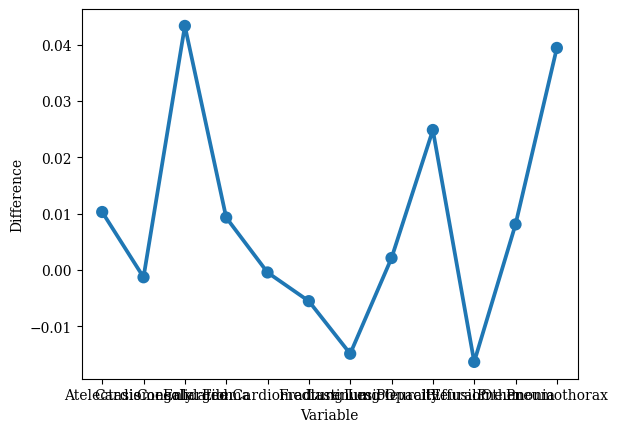

In [31]:
# Assuming melted_df is your DataFrame

# Calculate mean values for each group
mean_values = melted_df.groupby(['Variable', 'sex']).mean().reset_index()

# Pivot the table to have 'female' and 'male' as columns
pivot_table = mean_values.pivot_table(index='Variable', columns='sex', values='Value')

# Calculate the difference between 'female' and 'male'
pivot_table['Difference'] = pivot_table['female'] - pivot_table['male']

# Create dataframe
sns.pointplot(data = pd.DataFrame(pivot_table.reset_index()),x = 'Variable', y='Difference')

/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

Text(0, 0.5, '# of classes with p < 0.05')

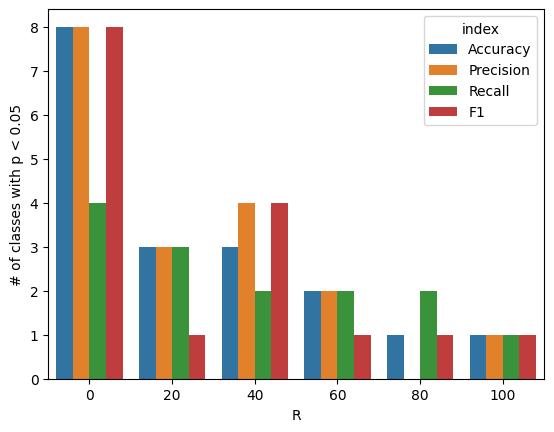

In [47]:
results = pd.DataFrame(sdf_per_metric,columns=['0','20','40','60','80','100'],index=['Accuracy','Precision','Recall','F1']).reset_index().rename_axis(index='Metrics')
results = pd.melt(results, id_vars='index', var_name='R', value_name='Value')
sns.barplot(data = results, x = 'R', y = 'Value',hue='index').set_ylabel('# of classes with p < 0.05')
#sns.barplot(data = results[results['index'] == 'F1'], x = 'R', y = 'Value',hue='index').set_ylabel('# of classes with p < 0.05')
